# Alberto Ramírez López      Tarea 2 - Cálculo 1

## EJERCICIO 1:

La proporción del área es: 0.148


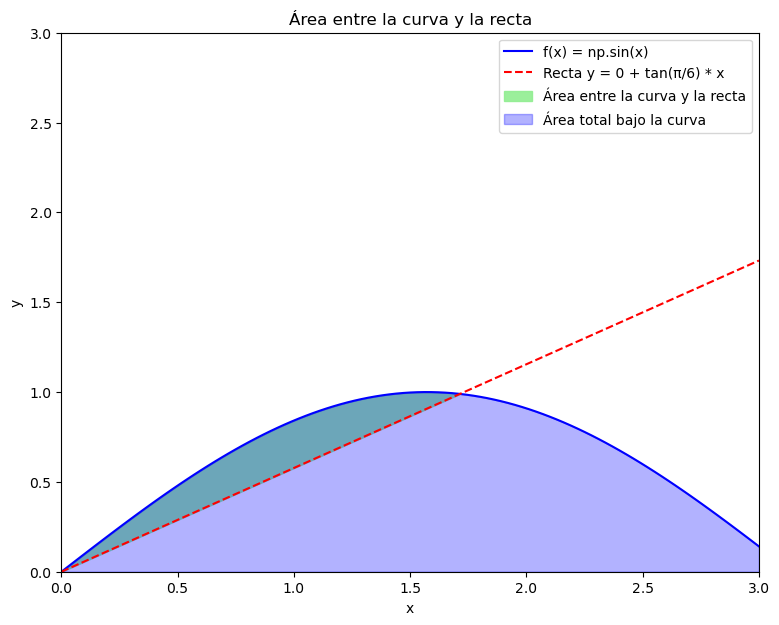

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

#Función que calcula el área entre la curva f(x) y la recta
def Area(func, ini, fin, t, theta, n=101):
    x = np.linspace(ini, fin, n)        #Crear un array de puntos x en el intervalo [ini, fin] con n puntos

    valores_f = func(x)
    recta = t + np.tan(theta) * x
    diferencia = np.maximum(0, valores_f - np.maximum(recta, 0))       #Calcular la diferencia entre la función y la recta

    return scipy.integrate.simpson(y=diferencia, x=x)

#Función que calcula la proporción del área entre la recta y la curva
def ProporcionArea(func, ini, fin, t, theta, n=101):
    x = np.linspace(ini, fin, n)
    valores_f = func(x)

    area_total = scipy.integrate.simpson(y=valores_f, x=x)      #Calcular el área total bajo la curva f(x) usando la regla de Simpson
    area_recta = Area(func, ini, fin, t, theta, n)          #Calcular el área entre la curva y la recta

    return area_recta / area_total      #Devolver la proporción entre el área entre la curva y la recta sobre el área total

#EJEMPLO:
#Definir funciones y parámetros
a, b = 0, 3  #Región A
t, theta = 0, np.pi / 6  #Recta
n = 101

def f(x):
    return np.sin(x)  #Función para la región A

#Gráfica
x = np.linspace(a, b, n)
fig, ax = plt.subplots(figsize=(9, 7))

    #Graficar la región A y la recta
ax.plot(x, f(x), color="blue", label="f(x) = np.sin(x)")
ax.plot(x, t + np.tan(theta) * x, color="red", linestyle='--', label=f"Recta y = {t} + tan(π/6) * x")

    #Rellenar el área entre la curva y la recta para la región A
plt.fill_between(x, t + np.tan(theta) * x, f(x), where=(f(x) >= t + np.tan(theta) * x), color='lightgreen', alpha=0.9, label="Área entre la curva y la recta")
plt.fill_between(x, f(x), color='blue', alpha=0.3, label="Área total bajo la curva")

ax.legend()

#Calcular y mostrar la proporción del área
area_proporcion = ProporcionArea(f, a, b, t, theta, n)
print(f"La proporción del área es: {area_proporcion:.3f}")

#Mostrar la gráfica
plt.title("Área entre la curva y la recta")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

## EJERCICIO 2:

El ángulo que divide la región A por la mitad es: 0.2528 radianes


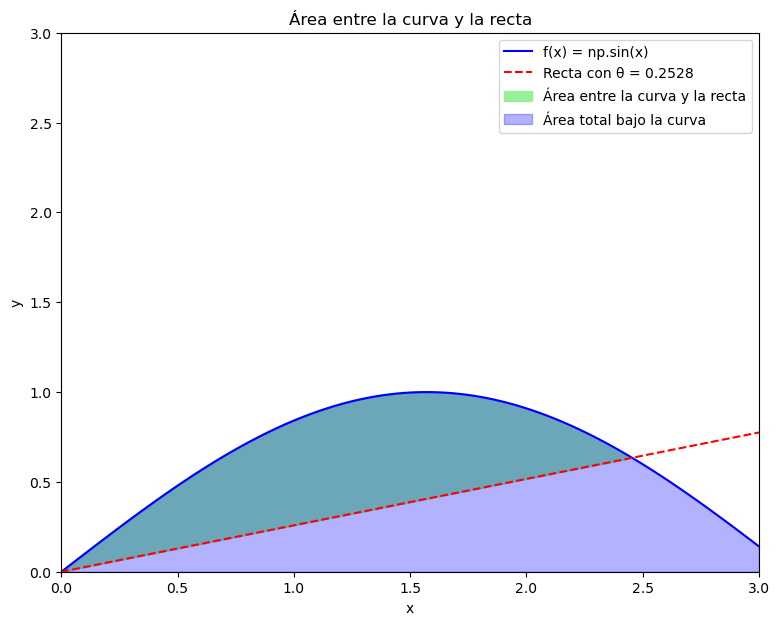

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Función que calcula la diferencia entre la proporción del área y 0.5
def diferencia(theta, func, a, b, t, n):
    return ProporcionArea(func, a, b, t, theta, n) - 0.5

#Función para encontrar el ángulo θ que divide la región A por la mitad
def Angulo(t, func, a, b, n, error1=0.000001):
    #Definir los límites para la bisección
    theta_min = -np.pi / 2
    theta_max = np.pi / 2

    #Método de bisección para encontrar el ángulo
    while (theta_max - theta_min) > error1:
        theta_mid = (theta_min + theta_max) / 2
        if diferencia(theta_mid, func, a, b, t, n) > 0:
            theta_min = theta_mid
        else:
            theta_max = theta_mid

    #El ángulo que divide la región A por la mitad
    return (theta_min + theta_max) / 2

#EJEMPLO:
#Definir la función f(x) y los parámetros
a, b = 0, 3
t = 0  
n = 101  

def f(x):
    return np.sin(x) 

#Encontrar el ángulo θ que divide la región A por la mitad
angulo_resultante = Angulo(t, f, a, b, n)
print(f"El ángulo que divide la región A por la mitad es: {angulo_resultante:.4f} radianes")

#Gráfica:
x = np.linspace(a, b, n)
fig, ax = plt.subplots(figsize=(9, 7))

    #Graficar la región A y la recta
ax.plot(x, f(x), color="blue", label="f(x) = np.sin(x)")
ax.plot(x, t + np.tan(angulo_resultante) * x, color="red", linestyle='--', label=f"Recta con θ = {angulo_resultante:.4f}")

    #Rellenar el área entre la curva y la recta para la región A
plt.fill_between(x, t + np.tan(angulo_resultante) * x, f(x), where=(f(x) >= t + np.tan(angulo_resultante) * x), color='lightgreen', alpha=0.9, label="Área entre la curva y la recta")
plt.fill_between(x, f(x), color='blue', alpha=0.3, label="Área total bajo la curva")

ax.legend()

    #Mostrar la gráfica
plt.title("Área entre la curva y la recta")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()


## EJERCICIO 3:

Este es el valor de t: 0.9255849311978335
Este es el valor de theta -0.03959999866460934


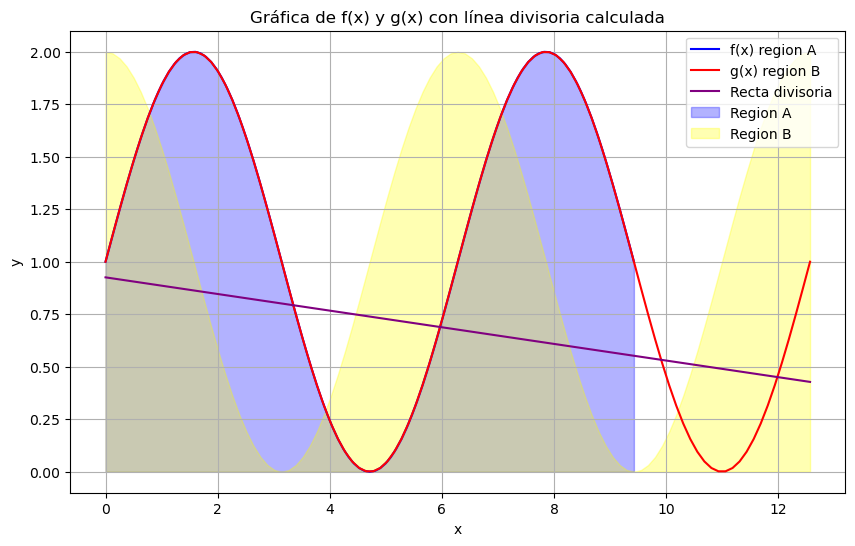

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):  #Función f(x) para la región A
    return np.sin(x) + 1

def g(x):  #Función g(x) para la región B
    return np.cos(x) + 1

a, b = 0, 3*np.pi  #Intervalo para la región A
c, d = 0, 4*np.pi  #Intervalo para la región B
n = 101  #Número de puntos
x0 = 0.5  #Valor inicial de t
error1 = 0.000001  #Precisión para el cálculo de los ángulos
error2 = 0.000001  #Precisión para el método de Newton

def RectaDivisoraNewton(x0, f, g, a, b, c, d, n, error1=0.000001, error2=0.001):
    def funcion(t):  #Función que calcula la diferencia de los ángulos
        ang_f = Angulo(t, f, a, b, n, error1)
        ang_g = Angulo(t, g, c, d, n, error1)
        return ang_f - ang_g
        
    def derivada(t, h=0.001):  #Derivada numerica de t
        return (funcion(t + h) - funcion(t - h)) / (2 * h)
    
    t = x0
    while abs(funcion(t)) > error2:
        prima_t = derivada(t)
        if prima_t == 0:
            raise ValueError("Al ser la derivada 0, el metodo de newton no puede seguir")
        t -= funcion(t) / prima_t
    theta = Angulo(t,f,a,b,n, error1)

    return t, theta

t, theta = RectaDivisoraNewton(x0, f, g, a, b, c, d, n, error1, error2)  #Calcular t
print("Este es el valor de t:", t)
print("Este es el valor de theta", theta)
x = np.linspace(min(a,c), max(b,d), n)
#Graficar
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(a,b,n), f(np.linspace(a,b,n)), label= "f(x) region A", color='blue')
plt.plot(np.linspace(c,d,n), f(np.linspace(c,d,n)), label= "g(x) region B", color='red')
plt.plot(x,t+ np.tan(theta)*x, label="Recta divisoria", color="purple")
plt.fill_between(np.linspace(a,b,n),0, f(np.linspace(a,b,n)), color="blue", alpha=0.3, label="Region A")
plt.fill_between(np.linspace(c,d,n),0, g(np.linspace(c,d,n)), color="yellow", alpha=0.3, label="Region B")
plt.title("Gráfica de f(x) y g(x) con línea divisoria calculada")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## EJERCICIO 4:

In [27]:

def RectaDivisoraBiseccion(f, g, a, b, c, d, n, error1=0.000001, error2=0.001):
    def h(t, f, g, a, b, c, d, n, error1): #Definir esta función como la diferencia de ángulos multiplicada por t
        ang_f = Angulo(t, f, a, b, n, error1)
        ang_g = Angulo(t, g, c, d, n, error1)
        return t * (ang_f - ang_g)
    #Establecer el intervalo inicial para t en A y B
    t_min, t_max = c, d
    h_min, h_max = h(t_min, f, g, a, b, c, d, n, error1), h(t_max, f, g, a, b, c, d, n, error1)
    
    #Verificar si hay cambio de signo en el intervalo inicial
    if h_min * h_max > 0:
        raise ValueError("No hay cambio de signo en el intervalo inicial, no se garantiza una raíz.")
    
    #Mientras que la longitud del intervalo sea mayor que el error
    while (t_max - t_min) / 2 > error2:
        t_mid = (t_min + t_max) / 2
        h_mid = h(t_mid, f, g, a, b, c, d, n, error1)
        
        #Si el valor en el punto medio es suficientemente cercano a cero, hemos encontrado la raíz
        if np.abs(h_mid) < error2:
            return t_mid
        
        #Actualizar el intervalo según el signo de la función anterior
        if h_min * h_mid < 0:
            t_max, h_max = t_mid, h_mid
        else:
            t_min, h_min = t_mid, h_mid
    
    #Cuando el intervalo es suficientemente pequeño, se devuelve el punto medio
    return (t_min + t_max) / 2

#EJEMPLO:
#Definir funciones y los intervalos para las regiones A y B
def f(x):
    return 1.5 + np.sin(x)
def g(x):
    return 1.5 + np.cos(x**2)

a, b = 0, 1  #Región A
c, d = 1, 4  #Región B

#Llamar a la función para calcular t
t_divisor_biseccion = RectaDivisoraBiseccion(f, g, a, b, c, d, n)
print(f"El valor de t que divide a A y B por la mitad es: {t_divisor_biseccion:.6}")

El valor de t que divide a A y B por la mitad es: 1.03955


## EJERCICIO 5:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# Definir funciones para los ejemplos
def f1(x):
    return 1.5 + np.cos(x)

def g1(x):
    return 1.5 + np.cos(x**2)

def f2(x):
    return np.sin(x)

def g2(x):
    return np.cos(x)

# Definir intervalos y parámetros
a, b = 0, 1
c, d = 1, 4
n = 101
x0 = 0.5
error1 = 0.000001
error2 = 0.000001

# Graficar los resultados
def graficar_resultados(f, g, a, b, c, d, n, t, theta, color1, color2, label1, label2, titulo):
    x = np.linspace(a, b, n)
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.plot(x, f(x), color=color1, label=label1)
    ax.plot(x, g(x), color=color2, label=label2)
    ax.plot(x, t + np.tan(theta) * x, color="red", linestyle="--", label="Recta divisora")
    ax.fill_between(x, f(x), color=color1, alpha=0.3, label="Área total bajo la curva f(x)")
    ax.fill_between(x, g(x), color=color2, alpha=0.3, label="Área bajo la curva g(x)")
    ax.legend()
    ax.set_title(titulo)
    plt.show()

# 1. Ejemplo con las funciones f(x) = 1.5 + cos(x) y g(x) = 1.5 + cos(x^2)
t1 = RectaDivisoraNewton(x0, f1, g1, a, b, c, d, n, error1, error2)
theta1 = Angulo(t1, f1, a, b, n)
graficar_resultados(f1, g1, a, b, c, d, n, t1, theta1, "blue", "orange", "f(x) = 1.5 + cos(x)", "g(x) = 1.5 + cos(x^2)", "Ejemplo 1: f(x) y g(x) = 1.5 + cos(x), 1.5 + cos(x^2)")

# 2. Ejemplo con las funciones f(x) = sin(x) y g(x) = cos(x)
t2 = RectaDivisoraNewton(x0, f2, g2, a, b, c, d, n, error1, error2)
theta2 = Angulo(t2, f2, a, b, n)
graficar_resultados(f2, g2, a, b, c, d, n, t2, theta2, "green", "purple", "f(x) = sin(x)", "g(x) = cos(x)", "Ejemplo 2: f(x) = sin(x), g(x) = cos(x)")


ValueError: Al ser la derivada 0, el metodo de newton no puede seguir